# Particle Swarm Optimization (PSO)

In [1]:
import numpy as np
from numpy import absolute
from numpy.random import uniform, choice
from random import randint

import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import HTML, display
from pprint import pprint
from tabulate import tabulate

In [2]:
def fitness_fx(x):
    x_np = np.array(x)
    sen_result = np.sin(10 * np.pi * x_np)
    fx = x_np * sen_result + 1

    return fx


if __name__ == '__main__':
    x = [1, 20, 50, 400]
    fx = fitness_fx(x)

    print(fx[1])


1.0000000000000786


In [3]:
class Particle:

    def __init__(self, position, velocity, best_position):
        self.position = position
        self.velocity = velocity
        self.best_position = best_position
        self.neighbors_particles = None

    def __repr__(self):
        position_neighbors = [x.position for x in self.neighbors_particles]
        return "Particle position: {0}\nVelocity: {1}\nBest position: {2}\nPositions of neighboring particles:\n{3}".format(
            self.position, self.velocity, self.best_position, position_neighbors)

    def __str__(self):
        position_neighbors = [x.position for x in self.neighbors_particles]
        return "Particle position: {0}\nVelocity: {1}\nBest position: {2}\nPositions of neighboring particles:\n{3}".format(
            self.position, self.velocity, self.best_position, position_neighbors)


In [4]:
# Parameters
(b_lo, b_up) = (-1, 2)  # Lower and up boundaries
n_dimensions = 5        # Number of genes per particle
n_particles = 100       # Number of particles in population
swam_size = 2           # Number of neighbors for each particle (swarm)
n_iters = 1000           # Number of iterations (criterion)
g = None                # Best known position (vector)
omega = 1               # Omega contant
phi_p = 0.5             # Phi p constant
phi_g = 0.5             # Phi g constant

Next we generate the initial population:

In [5]:
# Membuat populasi dari partikel
particle_pop = []
for i in range(n_particles):
    part_velocity = uniform(-absolute(b_lo - b_up), absolute(b_lo - b_up), size=n_dimensions)
    part_position = uniform(low=b_lo, high=b_up, size=n_dimensions)
    best_position = part_position
    
    if g is not None:
        if fitness_fx(best_position).sum() > fitness_fx(g).sum():
            g = best_position.copy()
    else:
        g = best_position.copy()

    p = Particle(position=part_position, velocity=part_velocity, best_position=best_position)
    particle_pop.append(p)
    
# Definisikan swarm dari setiap partikel
for particle in particle_pop:
    neighbors = choice(particle_pop, size=swam_size)
    particle.neighbors_particles = neighbors

In [6]:
print('Best known position (g) in the initial population:', g)
print('f(g): ', fitness_fx(g).sum())

Best known position (g) in the initial population: [ 1.25473552  0.8655809   1.89905903 -0.46028816  1.84600197]
f(g):  9.328859561783585


In [7]:
best_per_it = []

for it in range(n_iters):
    for particle in particle_pop:
        # Dapatkan nilai-nilai pada saat ini
        tmp_vel = particle.velocity.copy()
        tmp_position = particle.position.copy()
        tmp_best_pos = particle.best_position.copy()

        # Update kecepatan partikel
        new_velocity = []
        for d in range(n_dimensions):
            r_p, r_g = uniform(), uniform()
            v_id = omega * tmp_vel[d] + phi_p * r_p * (
                tmp_best_pos[d] - tmp_position[d]) + phi_g * r_g * (g[d] - tmp_position[d])
            new_velocity.append(v_id)
        particle.velocity = np.array(new_velocity)

        # Update posisi partikel
        tmp_position += new_velocity
        # If any dimension overcome the limits,
        # other values in the limits its generate for this dimension.
        tmp_position = [x if (-1 <= x <= 2) else uniform(low=b_lo, high=b_up) for x in tmp_position]
        particle.position = np.array(tmp_position)
        
        # Update posisi terbaik
        if fitness_fx(particle.position).sum() > fitness_fx(particle.best_position).sum():
            # Update the posisi terbaik partikel
            particle.best_position = particle.position
            
            if fitness_fx(particle.best_position).sum() > fitness_fx(g).sum():
                # Update posisi terbaik dari swarm
                g = particle.best_position
                
    best_per_it.append(g)

In [14]:
print('Best known position (g) after 1000 iterations:', g)
print('f(g): ', fitness_fx(g).sum())

Best known position (g) after 1000 iterations: [1.45399531 1.83684481 0.08758602 1.8621486  1.66364259]
f(g):  11.399382082332684


Next, we show the results by iteration. We can notice that the g position merge to a local minima.

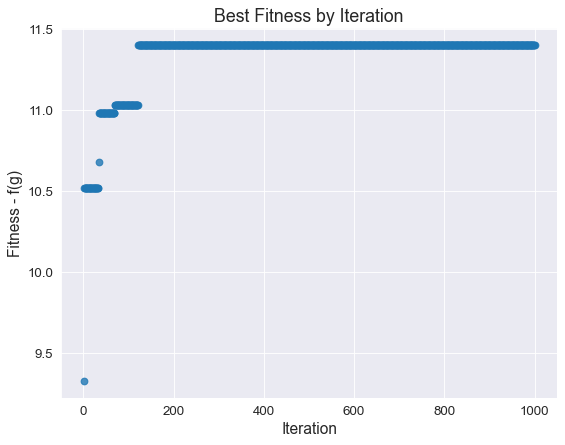

In [9]:
sns.set_style('darkgrid')

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

y = np.array([fitness_fx(x).sum() for x in best_per_it])
x = np.array(range(1, len(y)+1))

sns.regplot(x=x, y=y, fit_reg=False)
plt.title('Best Fitness by Iteration', fontsize=16)
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('Fitness - f(g)', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

# WIP

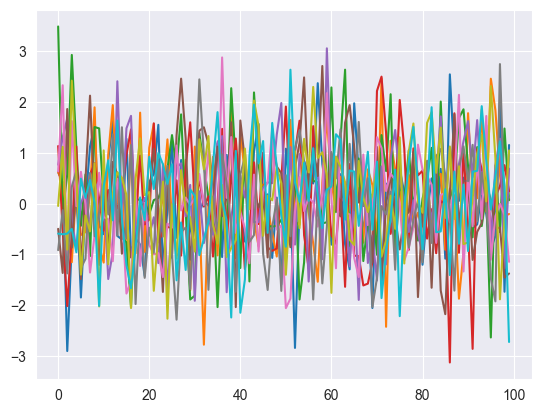

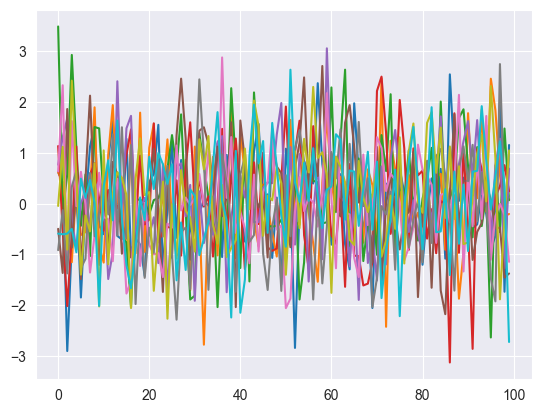

In [10]:
# WIP: function to show points moving in each iteration...
%matplotlib inline
import time
import pylab as pl
from IPython import display

for i in range(10):
    pl.plot(pl.randn(100))
    display.clear_output(wait=True)
    display.display(pl.gcf())
    time.sleep(1.0)